# From Neurons to Networks: Exploring Deep Learning Algorithms

Roderick Perez, Ph.D.
OMV

---

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage as ndimage
import torch
import torch.nn.functional as F

1.	Load an Image

In [65]:
# Load and display an image
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale for simplicity
    img_array = np.array(img)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.show()
    return img_array

2.	Show Image Pixels as Values

In [66]:
# Show pixel values
def show_pixel_values(image):
    print("Image Pixel Values:\n", image)

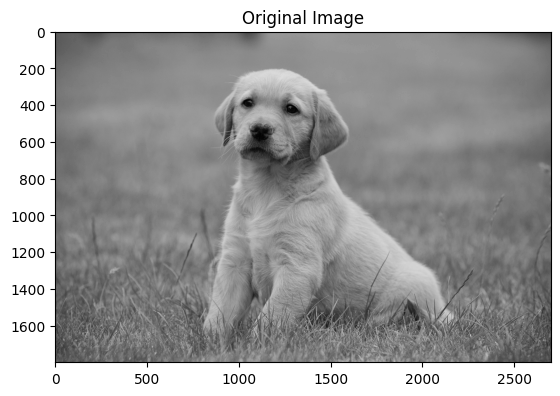

Image Pixel Values:
 [[91 83 87 ... 58 59 60]
 [87 82 86 ... 63 62 62]
 [88 86 90 ... 66 65 64]
 ...
 [82 83 88 ... 72 69 65]
 [87 87 90 ... 72 69 63]
 [88 86 88 ... 68 67 63]]


In [67]:
# Main Execution
image_path = 'dog.jpeg'
image = load_image(image_path)
show_pixel_values(image)

3.	Apply Convolution Kernels

In [68]:
# Apply convolution with a kernel
def apply_kernel(image, kernel):
    result = ndimage.convolve(image, kernel)
    plt.imshow(result, cmap='gray')
    plt.title('After Kernel Application')
    plt.show()
    return result

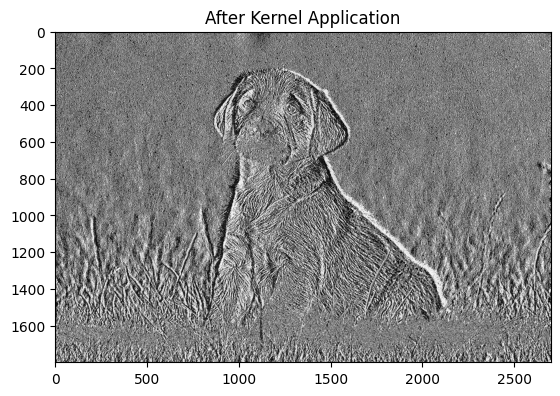

In [69]:
# Apply a kernel (edge detection as an example)
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Simple edge detection kernel
convolved_image = apply_kernel(image, kernel)

In [70]:
# Calculate new image size after convolution/pooling
def calculate_output_size(input_size, kernel_size, stride=1, padding=0):
    output_size = ((input_size - kernel_size + 2 * padding) // stride) + 1
    print(f"Output Image Size: {output_size} x {output_size}")
    return output_size

4.	Apply Pooling Operations

In [71]:
# Apply pooling operation
def apply_pooling(image, pool_type, kernel_size=2, stride=2, padding=0):
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    if pool_type == 'max':
        result = F.max_pool2d(image_tensor, kernel_size=kernel_size, stride=stride, padding=padding)
    elif pool_type == 'min':
        result = -F.max_pool2d(-image_tensor, kernel_size=kernel_size, stride=stride, padding=padding)
    elif pool_type == 'avg':
        result = F.avg_pool2d(image_tensor, kernel_size=kernel_size, stride=stride, padding=padding)
    result = result.squeeze().numpy()
    plt.imshow(result, cmap='gray')
    plt.title(f'{pool_type.capitalize()} Pooling (Kernel Size: {kernel_size}, Stride: {stride})')
    plt.show()
    return result

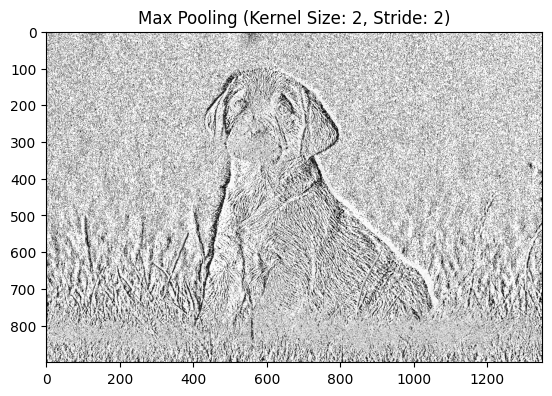

In [72]:
# Apply pooling
pooled_image = apply_pooling(convolved_image, pool_type='max', kernel_size=2, stride=2, padding=0)

In [73]:
# Calculate new size after applying convolution or pooling
pooled_image.shape

(900, 1350)

5.	Apply Activation Functions

In [74]:
# Apply activation functions
def apply_activation(image, activation):
    if activation == 'relu':
        result = np.maximum(image, 0)
    elif activation == 'sigmoid':
        result = 1 / (1 + np.exp(-image))
    elif activation == 'softmax':
        exp_vals = np.exp(image - np.max(image))
        result = exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)
    plt.imshow(result, cmap='gray')
    plt.title(f'After {activation.capitalize()} Activation')
    plt.show()
    return result

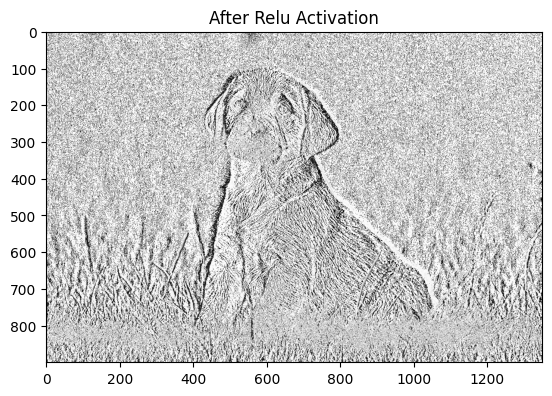

In [75]:
# Apply activation function
activationFunction_image_relu = apply_activation(pooled_image, activation='relu')

In [76]:
activationFunction_image_relu.shape

(900, 1350)

In [77]:
activationFunction_image_relu.min(), activationFunction_image_relu.max()

(0.0, 255.0)

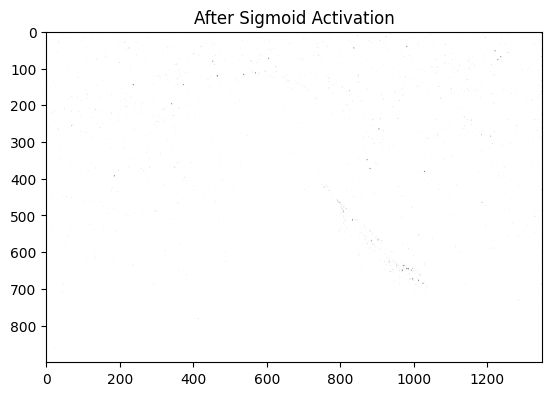

In [78]:
# Apply activation function
activationFunction_image_sigmoid = apply_activation(pooled_image, activation='sigmoid')

In [79]:
activationFunction_image_sigmoid.shape

(900, 1350)

In [80]:
activationFunction_image_sigmoid.min(), activationFunction_image_sigmoid.max()

(0.5, 1.0)

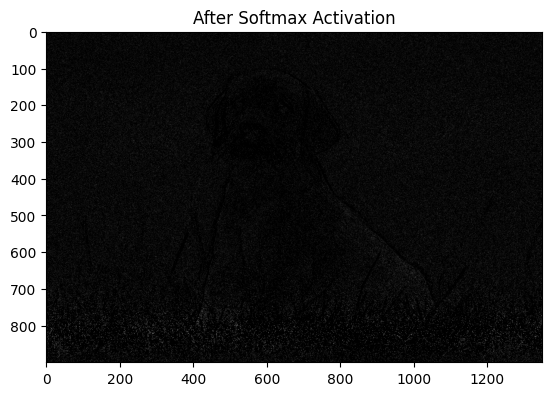

In [81]:
# Apply activation function
activationFunction_image_softmax = apply_activation(pooled_image, activation='softmax')

In [82]:
activationFunction_image_softmax.shape

(900, 1350)

In [83]:
activationFunction_image_softmax.min(), activationFunction_image_softmax.max()

(0.0, 0.023852704)

6.	Generate Feature Maps

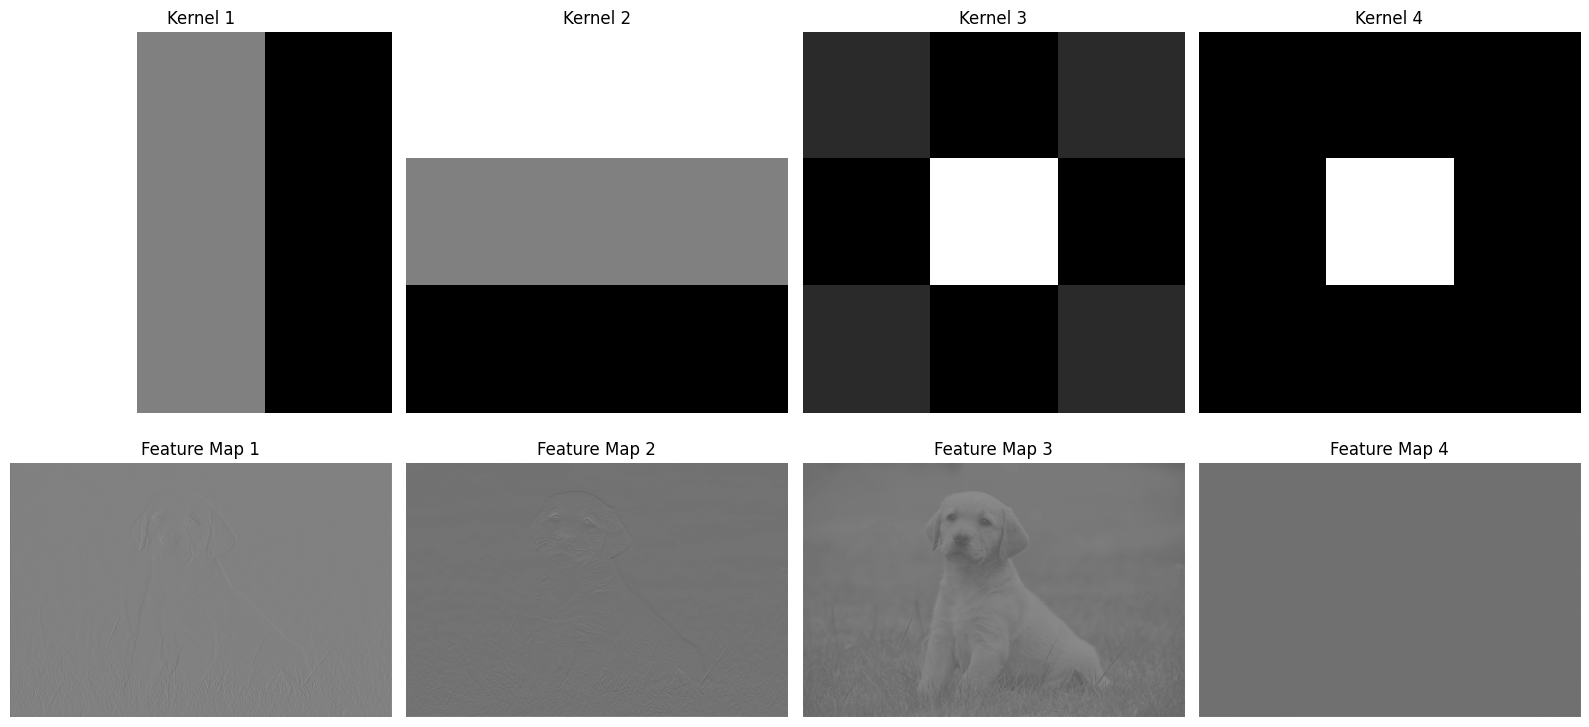

In [85]:
# Apply multiple convolution kernels (filters) and display feature maps
def apply_multiple_kernels(image, kernels):
    feature_maps = []
    num_kernels = len(kernels)
    fig, axes = plt.subplots(2, num_kernels, figsize=(4*num_kernels, 8))

    for i, kernel in enumerate(kernels):
        # Display the kernel in black and white (grayscale)
        axes[0, i].imshow(kernel, cmap='gray', interpolation='nearest')
        axes[0, i].set_title(f'Kernel {i+1}')
        axes[0, i].axis('off')

        # Apply convolution using PyTorch
        image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        feature_map = F.conv2d(image_tensor, kernel_tensor, padding=1)  # Added padding for size consistency
        feature_map = feature_map.squeeze().detach().numpy()

        # Enhance the feature map for better visibility
        feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
        feature_map = np.clip(feature_map, 0, 1)  # Ensure values are within [0, 1]

        # Display the resulting feature map
        axes[1, i].imshow(feature_map, cmap='gray')
        axes[1, i].set_title(f'Feature Map {i+1}')
        axes[1, i].axis('off')

        feature_maps.append(feature_map)

    plt.tight_layout()
    plt.show()
    return feature_maps

# Define kernels (filters)
kernels = [
    np.array([[1, 0, -1],
              [1, 0, -1],
              [1, 0, -1]]),  # Vertical edge detection

    np.array([[1, 1, 1],
              [0, 0, 0],
              [-1, -1, -1]]),  # Horizontal edge detection

    np.array([[0, -1, 0],
              [-1, 5, -1],
              [0, -1, 0]]),  # Sharpening filter

    np.array([[-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]])  # Edge detection in all directions
]

# Apply kernels and display feature maps
feature_maps = apply_multiple_kernels(image, kernels)
